In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install tensorflow

  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.13.0
    Uninstalling tensorflow-intel-2.13.0:
      Successfully uninstalled tensorflow-intel-2.13.0


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Input, Dropout, Lambda

In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16


In [5]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

Creating an object of VGG16 class, with its original weights used in imagenet challenge. Excluding the last layer from its architecture.

In [6]:
conv_base = VGG16(weights='imagenet',include_top = False,input_shape=(256,256,3))

Freezing the weights in conv_base therefore we won't train those weights

In [7]:
for layer in conv_base.layers:
    layer.trainable = False
#conv_base.trainable = False

Creating a sequential model with conv_base layers and 2 dense layers including the ouput layer

In [8]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Importing the images from train folder, applying data augmentation and creating train and validation datasets.

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,    #Normalozing the pixel values using min-max scaling
#                              shear_range=0.2,   # Shear the image by up to 20%
#                              zoom_range=0.2,    # Zoom in or out on the image by up to 20%
#                              horizontal_flip=True, # Flip the image horizontally
                             validation_split = 0.2)

# Load images from directory
directory = 'train'
batch_size = 32
img_height = 256
img_width = 256

train_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset = 'training')

test_generator = datagen.flow_from_directory(
        directory,
        target_size = (img_height, img_width),
        batch_size = batch_size,
        class_mode = 'binary',
        subset = 'validation')

Found 11975 images belonging to 2 classes.
Found 2993 images belonging to 2 classes.


In [10]:
for x_batch, y_batch in train_generator:
    print(x_batch.shape)
    print(y_batch.shape)
    break

(32, 256, 256, 3)
(32,)


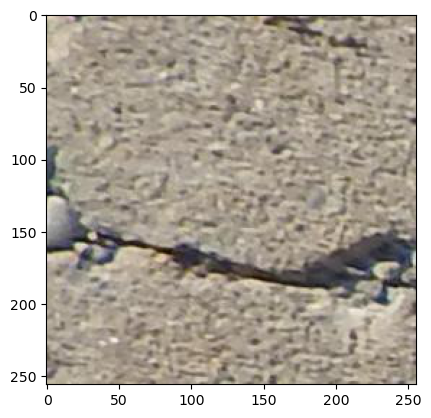

In [11]:
import random
idx = random.randint(0, len(y_batch))
plt.imshow(x_batch[idx, :])
#plt.show()

In [12]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
375/375 [==============================] - 1692s 5s/step - loss: 0.6326 - accuracy: 0.6788 - val_loss: 0.5050 - val_accuracy: 0.7457
Epoch 2/10
375/375 [==============================] - 1693s 5s/step - loss: 0.4925 - accuracy: 0.7476 - val_loss: 0.5195 - val_accuracy: 0.7297
Epoch 3/10
375/375 [==============================] - 5910s 16s/step - loss: 0.4530 - accuracy: 0.7724 - val_loss: 0.4819 - val_accuracy: 0.7524
Epoch 4/10
375/375 [==============================] - 3837s 10s/step - loss: 0.4236 - accuracy: 0.7896 - val_loss: 0.4731 - val_accuracy: 0.7558
Epoch 5/10
375/375 [==============================] - 1754s 5s/step - loss: 0.4045 - accuracy: 0.8028 - val_loss: 0.4601 - val_accuracy: 0.7598
Epoch 6/10
375/375 [==============================] - 2280s 6s/step - loss: 0.3808 - accuracy: 0.8179 - val_loss: 0.5034 - val_accuracy: 0.7685
Epoch 7/10
375/375 [==============================] - 1739s 5s/step - loss: 0.3715 - accuracy: 0.8253 - val_loss: 0.5302 - val_accurac

In [20]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image

# Load your trained model (replace 'model.h5' with the path to your saved model)
#model = tf.keras.models.load_model('model.h5')

test_path = 'test'
test_predictions = np.array([])
test_labels = []

for img in os.listdir(test_path):
    image_path = os.path.join(test_path, img)
    
    # Load and resize the test image to (256, 256, 3)
    image = Image.open(image_path)
    image = image.resize((256, 256))
    image = tf.keras.utils.img_to_array(image)
    image = np.array([image])
    image = image / 255.0  # Normalize the image
    
    # Make predictions
    predictions = np.squeeze((model.predict(image) >= 0.5))
    test_predictions = np.append(test_predictions, predictions)
    
    if predictions == 1:
        test_labels.append("uncracked")
    elif predictions == 0:
        test_labels.append("cracked")

# Print test predictions and labels
for img, label in zip(os.listdir(test_path), test_labels):
    print(f"Image: {img}, Prediction: {label}")


1/1 [==============================] - 1s 510ms/step


1/1 [==============================] - 0s 454ms/step


1/1 [==============================] - 0s 332ms/step


1/1 [==============================] - 0s 382ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 1s 500ms/step


1/1 [==============================] - 0s 421ms/step


1/1 [==============================] - 0s 484ms/step


1/1 [==============================] - 0s 377ms/step


1/1 [==============================] - 1s 513ms/step


1/1 [==============================] - 0s 498ms/step


1/1 [==============================] - 1s 524ms/step


1/1 [==============================] - 0s 472ms/step
Image: 1.jpg, Prediction: uncracked
Image: 10.jpg, Prediction: cracked
Image: 100.jpg, Prediction: cracked
Image: 1000.jpg, Prediction: cracked
Image: 1001.jpg, Prediction: uncracked
Image: 1002.jpg, Prediction: cracked
Image: 1003.jpg, Prediction: cracked
Image: 1004.jpg, Prediction: uncracked
Image: 1005.jpg, Prediction: cracked
Image: 1006.jpg, Prediction: uncracked
Image: 1007.jpg, Prediction: cracked
Image: 1008.jpg, Prediction: uncracked
Image: 1009.jpg, Prediction: cracked
Image: 101.jpg, Prediction: cracked
Image: 1010.jpg, Prediction: uncracked
Image: 1011.jpg, Prediction: uncracked
Image: 1012.jpg, Prediction: uncracked
Image: 1013.jpg, Prediction: uncracked
Image: 1014.jpg, Prediction: uncracked
Image: 1015.jpg, Prediction: uncracked
Image: 1016.jpg, Prediction: uncracked
Image: 1017.jpg, Prediction: cracked
Image: 1018.jpg, Prediction: uncracked
Image: 1019.jpg, Prediction: cracked
Image: 102.jpg, Prediction: cracked
Imag

In [16]:
pip install --upgrade tensorflow keras

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Obtaining dependency information for tensorflow-estimator<2.14,>=2.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.3.0 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.6.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [21]:
import pandas as pd
filename=os.listdir('test')

data = pd.DataFrame({'filename':filename,'class':test_labels})
# data['class']=data['class'].apply(str)
# data
# data['class']=data['class'].str.replace('0.0','cracked')
# data['class']=data['class'].str.replace('1.0','uncracked')
data.to_csv('output2_assg2.csv')

In [22]:
import gradio as gr
import numpy as np
from PIL import Image

def classify_image(input_image):
    # Load and preprocess the input image
    image = Image.fromarray((input_image * 255).astype(np.uint8))
    image = image.resize((256, 256))
    
    # Perform classification using an external model (e.g., TensorFlow Serving, a REST API, etc.)
    # Replace this part with code to call your external model
    # Example:
    # result = call_external_model(image)
    
    # For demonstration purposes, we'll use a random result here
    result = "Uncracked" if np.random.rand() > 0.5 else "Cracked"
    
    return result

# Create a Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs="image",
    outputs="text",
    title="Image Classifier",
    description="Upload an image and get it classified as 'Cracked' or 'Uncracked'.",
    live=True
)

# Launch the Gradio interface
iface.launch()


ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (C:\Users\harih\anaconda3\Lib\site-packages\typing_extensions.py)